In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

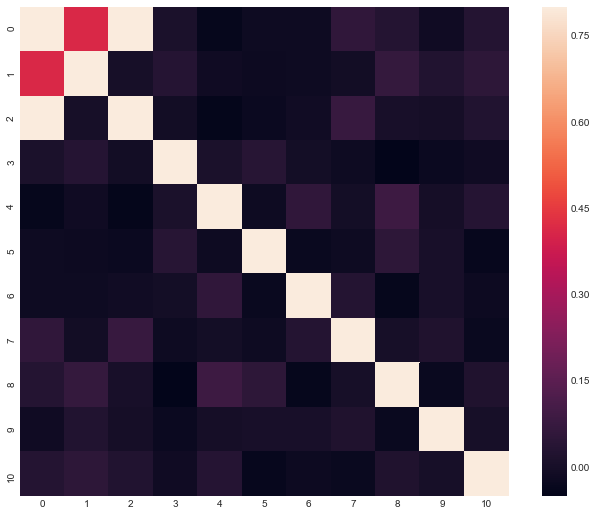

In [2]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.824797845362
R-squared PLSR: 0.824797447146


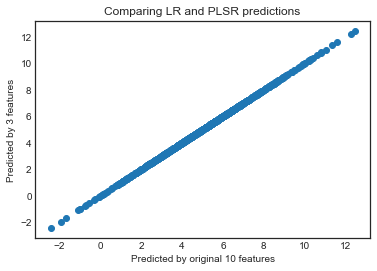

In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

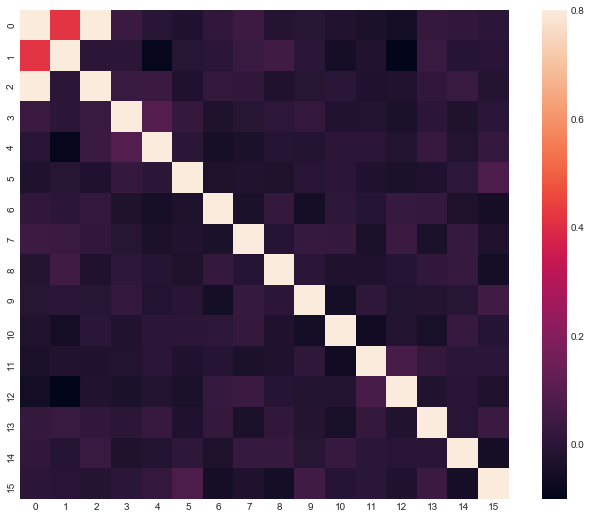

In [19]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 15

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Number of dimensions:  15
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743224607
Difference:  0.0


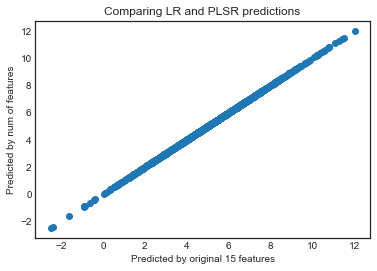

Number of dimensions:  14
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743224607
Difference:  1.11022302463e-16


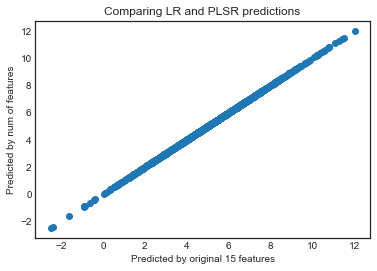

Number of dimensions:  13
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743224607
Difference:  0.0


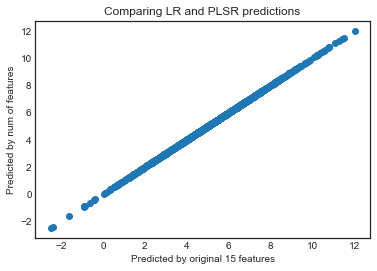

Number of dimensions:  12
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743224607
Difference:  0.0


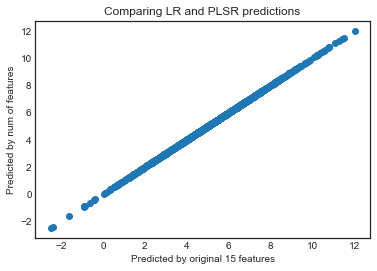

Number of dimensions:  11
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743224607
Difference:  0.0


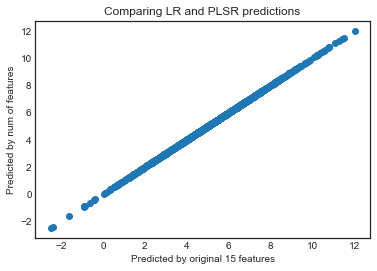

Number of dimensions:  10
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743224607
Difference:  0.0


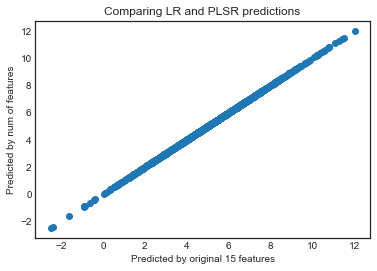

Number of dimensions:  9
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743224607
Difference:  1.11022302463e-16


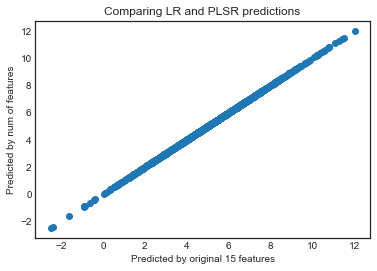

Number of dimensions:  8
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743224607
Difference:  1.11022302463e-16


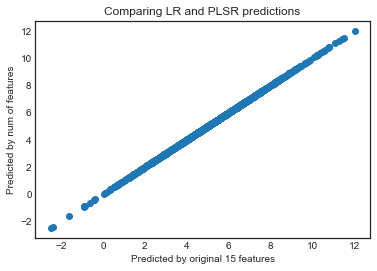

Number of dimensions:  7
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743224607
Difference:  6.32827124036e-15


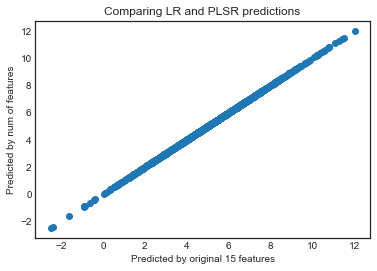

Number of dimensions:  6
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743224607
Difference:  4.33320046511e-13


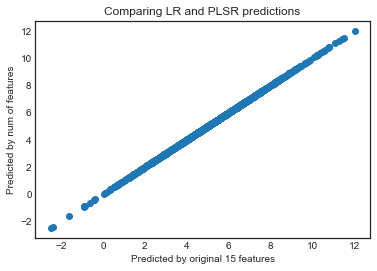

Number of dimensions:  5
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743224555
Difference:  5.19273513078e-11


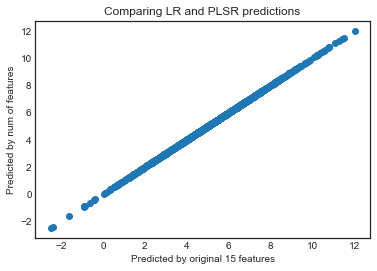

Number of dimensions:  4
R-squared regression: 0.841743224607
R-squared PLSR: 0.841743214167
Difference:  1.04405980528e-08


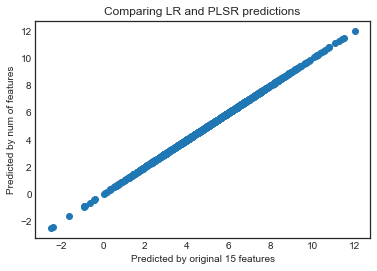

Number of dimensions:  3
R-squared regression: 0.841743224607
R-squared PLSR: 0.841742323904
Difference:  9.0070300407e-07


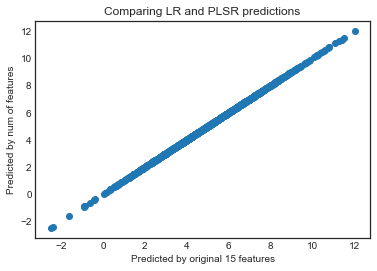

Number of dimensions:  2
R-squared regression: 0.841743224607
R-squared PLSR: 0.841631263604
Difference:  0.000111961002762


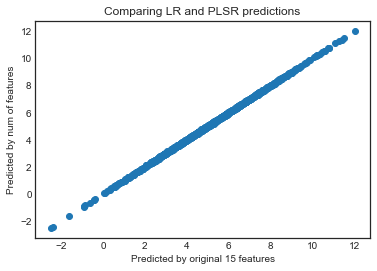

Number of dimensions:  1
R-squared regression: 0.841743224607
R-squared PLSR: 0.833057573842
Difference:  0.00868565076555


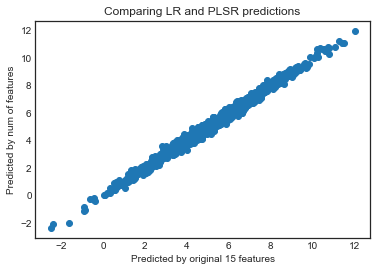

In [46]:



# Fit a linear model with all 15 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)


# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to all dimensions.
for num in range(15, 0, -1):
    pls1 = PLSRegression(n_components=num)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    print('Number of dimensions: ',num)
    print('R-squared regression:', regr.score(X, y))
    print('R-squared PLSR:', pls1.score(X, y))
    print('Difference: ', regr.score(X, y)-pls1.score(X, y))

    # Compare the predictions of the two models
    plt.scatter(Y_pred,Y_PLS_pred) 
    plt.xlabel('Predicted by original 15 features')
    plt.ylabel('Predicted by num of features')
    plt.title('Comparing LR and PLSR predictions')
    plt.show()

When using 15 components, we can cut it down to 9 dimensions before there is any changed in r-squared. Realistically, we can cut this model all the way down to 1 dimension without having a large impact on r-squared.

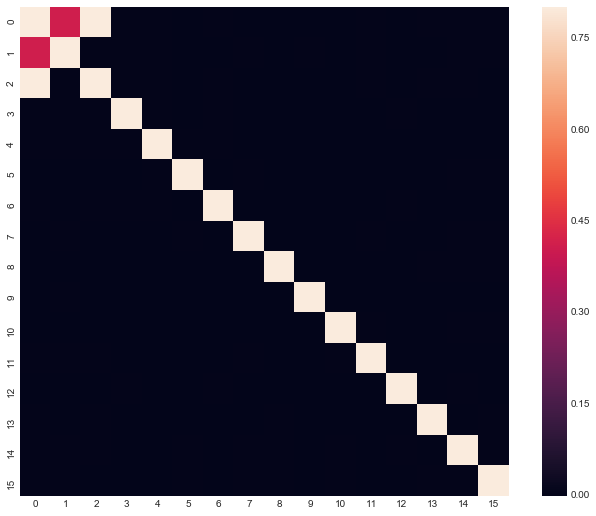

In [47]:
# Number of datapoints in outcome.
n = 1000000

# Number of features.
p = 15

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Number of dimensions:  15
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  1.11022302463e-16


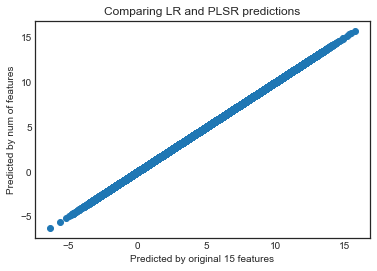

Number of dimensions:  14
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  1.11022302463e-16


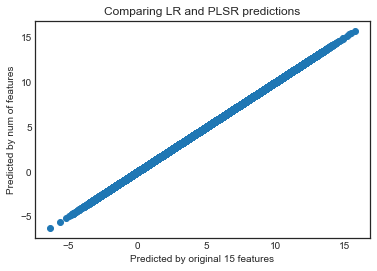

Number of dimensions:  13
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  0.0


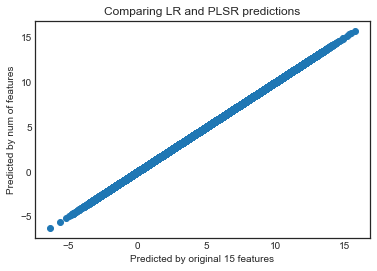

Number of dimensions:  12
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  0.0


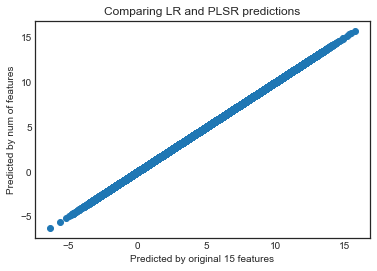

Number of dimensions:  11
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  0.0


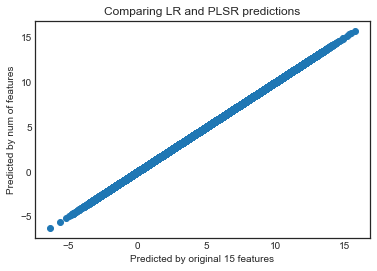

Number of dimensions:  10
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  0.0


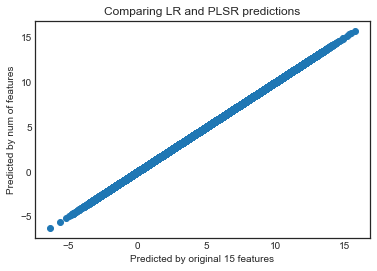

Number of dimensions:  9
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  0.0


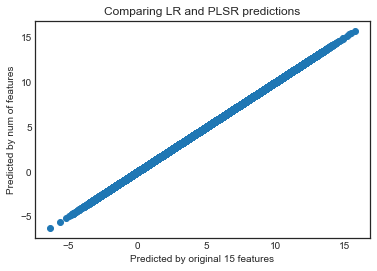

Number of dimensions:  8
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  0.0


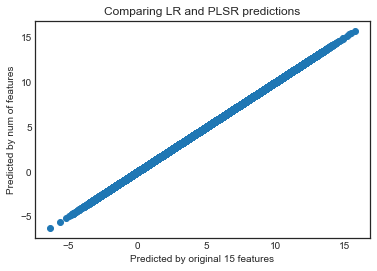

Number of dimensions:  7
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  0.0


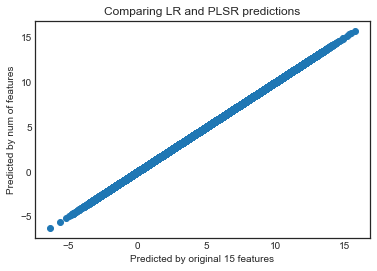

Number of dimensions:  6
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  1.11022302463e-16


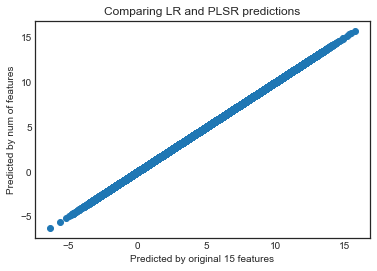

Number of dimensions:  5
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  0.0


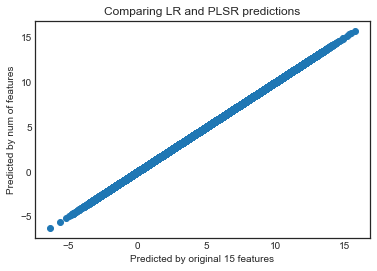

Number of dimensions:  4
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  1.11022302463e-16


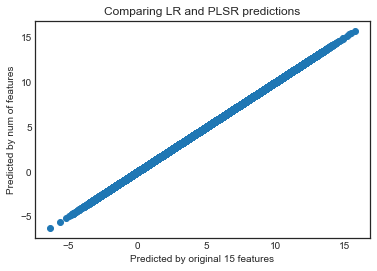

Number of dimensions:  3
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794895
Difference:  8.881784197e-16


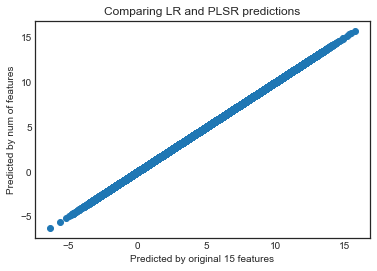

Number of dimensions:  2
R-squared regression: 0.833876794895
R-squared PLSR: 0.833876794812
Difference:  8.24105228503e-11


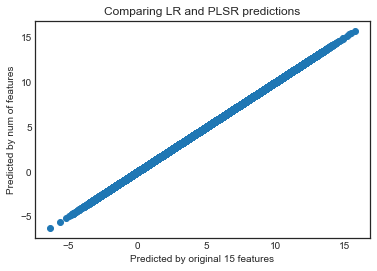

Number of dimensions:  1
R-squared regression: 0.833876794895
R-squared PLSR: 0.833863816083
Difference:  1.29788115484e-05


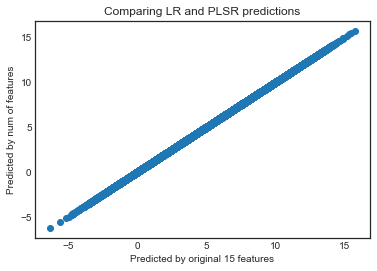

In [48]:



# Fit a linear model with all 15 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)


# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to all dimensions.
for num in range(15, 0, -1):
    pls1 = PLSRegression(n_components=num)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    print('Number of dimensions: ',num)
    print('R-squared regression:', regr.score(X, y))
    print('R-squared PLSR:', pls1.score(X, y))
    print('Difference: ', regr.score(X, y)-pls1.score(X, y))

    # Compare the predictions of the two models
    plt.scatter(Y_pred,Y_PLS_pred) 
    plt.xlabel('Predicted by original 15 features')
    plt.ylabel('Predicted by num of features')
    plt.title('Comparing LR and PLSR predictions')
    plt.show()

With 1,000,000 datapoints, we can safely reduce the dimensions down to 1 without affecting the expected values.

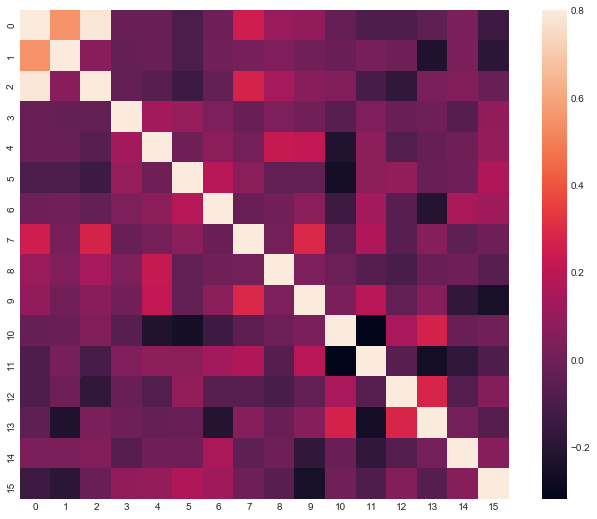

In [49]:
# Number of datapoints in outcome.
n = 100

# Number of features.
p = 15

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Number of dimensions:  15
R-squared regression: 0.878250983568
R-squared PLSR: 0.878250983568
Difference:  0.0


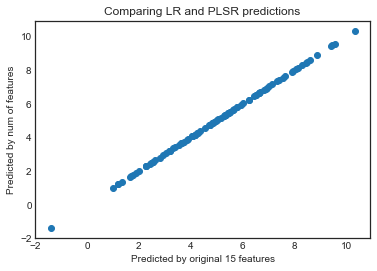

Number of dimensions:  14
R-squared regression: 0.878250983568
R-squared PLSR: 0.878250983568
Difference:  0.0


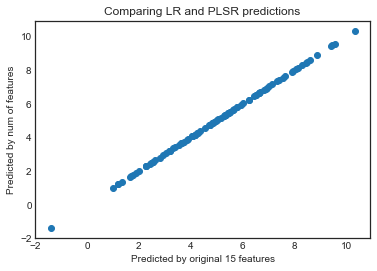

Number of dimensions:  13
R-squared regression: 0.878250983568
R-squared PLSR: 0.878250983568
Difference:  3.33066907388e-16


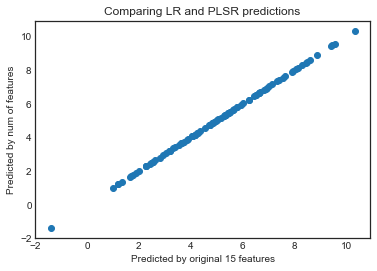

Number of dimensions:  12
R-squared regression: 0.878250983568
R-squared PLSR: 0.878250983568
Difference:  2.33146835171e-14


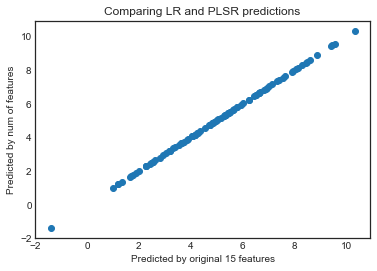

Number of dimensions:  11
R-squared regression: 0.878250983568
R-squared PLSR: 0.878250983567
Difference:  9.16711151433e-13


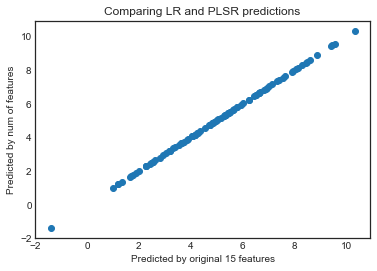

Number of dimensions:  10
R-squared regression: 0.878250983568
R-squared PLSR: 0.87825098356
Difference:  8.02025112989e-12


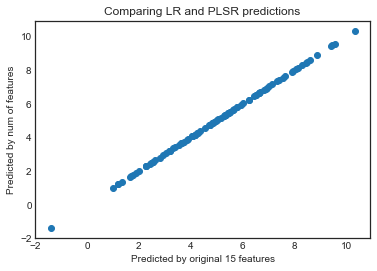

Number of dimensions:  9
R-squared regression: 0.878250983568
R-squared PLSR: 0.878250983313
Difference:  2.55138687955e-10


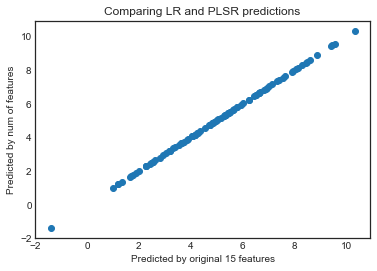

Number of dimensions:  8
R-squared regression: 0.878250983568
R-squared PLSR: 0.878250982103
Difference:  1.46474543605e-09


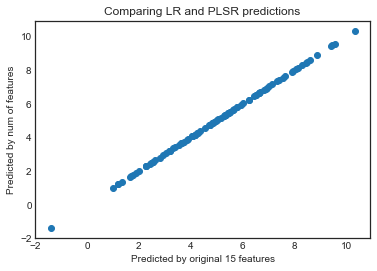

Number of dimensions:  7
R-squared regression: 0.878250983568
R-squared PLSR: 0.878250963075
Difference:  2.04929123671e-08


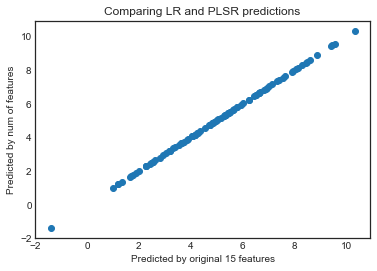

Number of dimensions:  6
R-squared regression: 0.878250983568
R-squared PLSR: 0.878249272673
Difference:  1.71089457324e-06


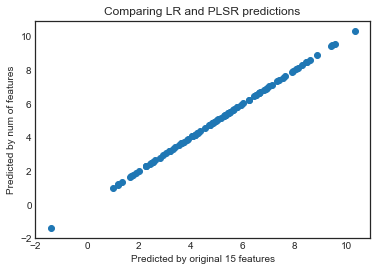

Number of dimensions:  5
R-squared regression: 0.878250983568
R-squared PLSR: 0.878220043859
Difference:  3.09397092692e-05


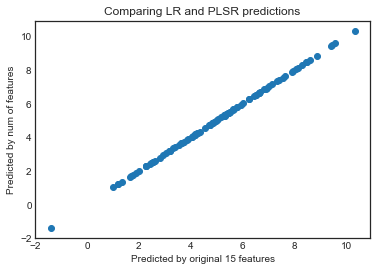

Number of dimensions:  4
R-squared regression: 0.878250983568
R-squared PLSR: 0.878106577682
Difference:  0.000144405885737


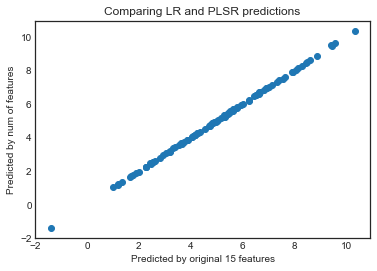

Number of dimensions:  3
R-squared regression: 0.878250983568
R-squared PLSR: 0.877133739102
Difference:  0.00111724446621


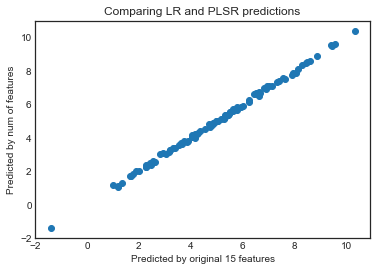

Number of dimensions:  2
R-squared regression: 0.878250983568
R-squared PLSR: 0.869225131261
Difference:  0.00902585230734


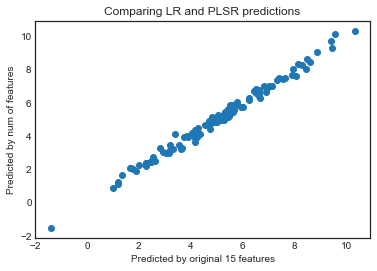

Number of dimensions:  1
R-squared regression: 0.878250983568
R-squared PLSR: 0.788224883411
Difference:  0.0900261001567


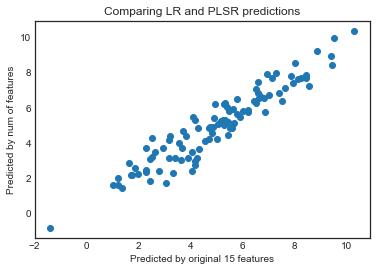

In [50]:
# Fit a linear model with all 15 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)


# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to all dimensions.
for num in range(15, 0, -1):
    pls1 = PLSRegression(n_components=num)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    print('Number of dimensions: ',num)
    print('R-squared regression:', regr.score(X, y))
    print('R-squared PLSR:', pls1.score(X, y))
    print('Difference: ', regr.score(X, y)-pls1.score(X, y))

    # Compare the predictions of the two models
    plt.scatter(Y_pred,Y_PLS_pred) 
    plt.xlabel('Predicted by original 15 features')
    plt.ylabel('Predicted by num of features')
    plt.title('Comparing LR and PLSR predictions')
    plt.show()

With only 100 data points, reducing the dimensions has a larger effect on the expected values.

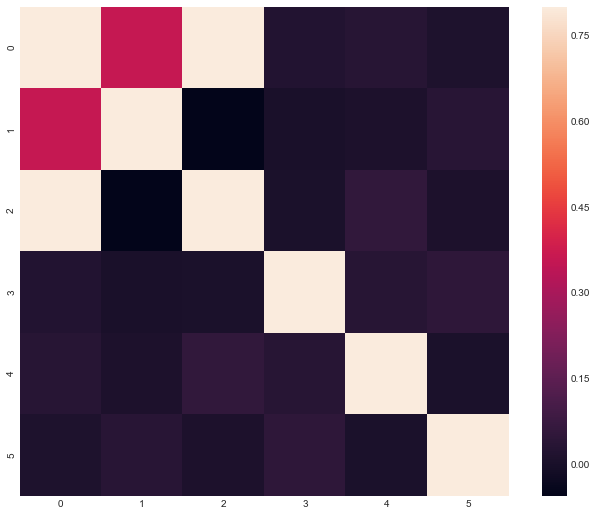

In [51]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 5

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Number of dimensions:  5
R-squared regression: 0.838829418878
R-squared PLSR: 0.838829418878
Difference:  0.0


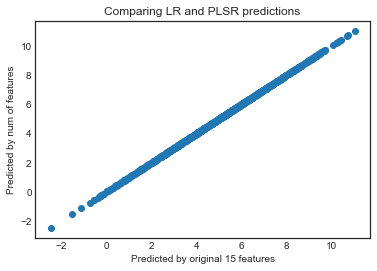

Number of dimensions:  4
R-squared regression: 0.838829418878
R-squared PLSR: 0.838829418878
Difference:  8.51985149097e-13


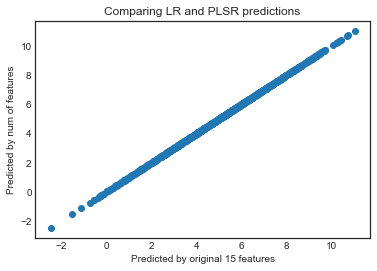

Number of dimensions:  3
R-squared regression: 0.838829418878
R-squared PLSR: 0.83882941732
Difference:  1.55820623071e-09


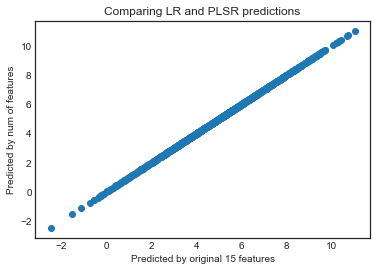

Number of dimensions:  2
R-squared regression: 0.838829418878
R-squared PLSR: 0.838821678404
Difference:  7.74047488949e-06


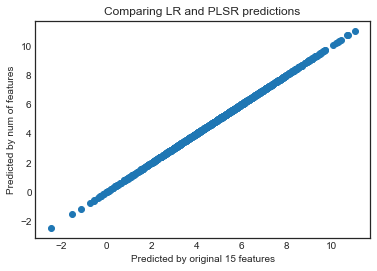

Number of dimensions:  1
R-squared regression: 0.838829418878
R-squared PLSR: 0.83424812149
Difference:  0.0045812973887


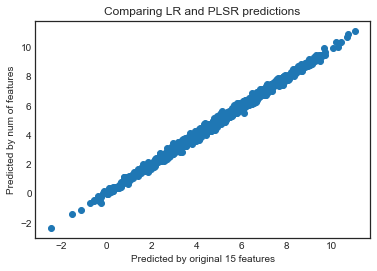

In [52]:
# Fit a linear model with all 15 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)


# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to all dimensions.
for num in range(p, 0, -1):
    pls1 = PLSRegression(n_components=num)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    print('Number of dimensions: ',num)
    print('R-squared regression:', regr.score(X, y))
    print('R-squared PLSR:', pls1.score(X, y))
    print('Difference: ', regr.score(X, y)-pls1.score(X, y))

    # Compare the predictions of the two models
    plt.scatter(Y_pred,Y_PLS_pred) 
    plt.xlabel('Predicted by original 15 features')
    plt.ylabel('Predicted by num of features')
    plt.title('Comparing LR and PLSR predictions')
    plt.show()

With a smaller number of starting features, reducing dimensions has a small but immediate affect on expected values.

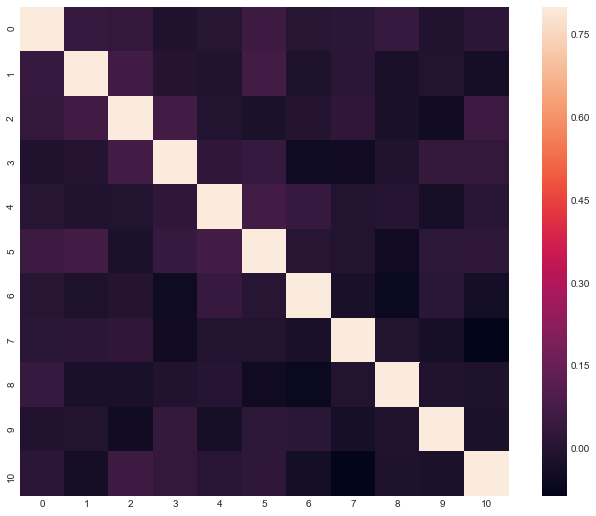

In [62]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] * X[:, 1] + np.random.normal(size=n * 1)

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Number of dimensions:  10
R-squared regression: 0.00812072567146
R-squared PLSR: 0.00812072567146
Difference:  0.0


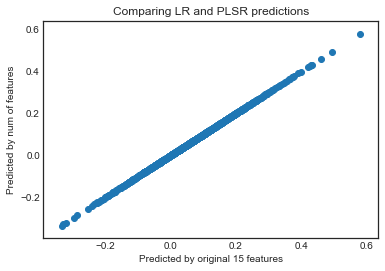

Number of dimensions:  9
R-squared regression: 0.00812072567146
R-squared PLSR: 0.00812072567146
Difference:  0.0


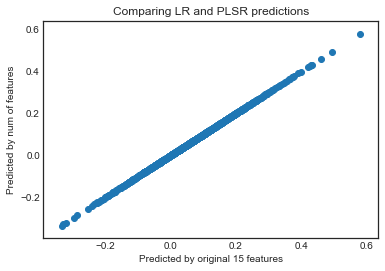

Number of dimensions:  8
R-squared regression: 0.00812072567146
R-squared PLSR: 0.00812072567146
Difference:  0.0


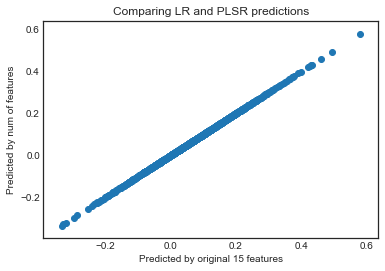

Number of dimensions:  7
R-squared regression: 0.00812072567146
R-squared PLSR: 0.00812072567146
Difference:  1.11022302463e-16


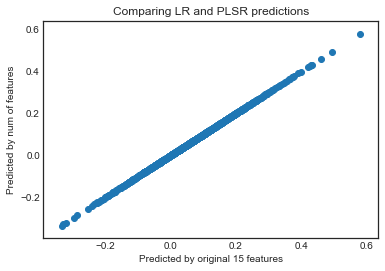

Number of dimensions:  6
R-squared regression: 0.00812072567146
R-squared PLSR: 0.00812072567146
Difference:  1.55431223448e-15


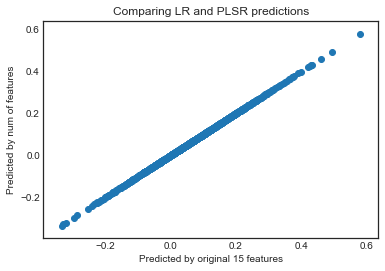

Number of dimensions:  5
R-squared regression: 0.00812072567146
R-squared PLSR: 0.00812072567117
Difference:  2.91544566267e-13


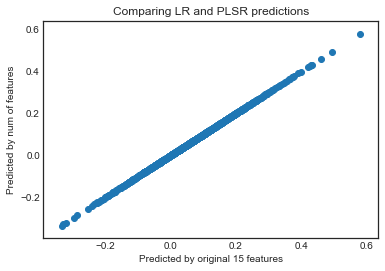

Number of dimensions:  4
R-squared regression: 0.00812072567146
R-squared PLSR: 0.00812072563893
Difference:  3.2531533023e-11


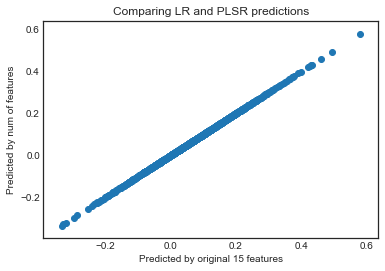

Number of dimensions:  3
R-squared regression: 0.00812072567146
R-squared PLSR: 0.00812072214653
Difference:  3.52492401934e-09


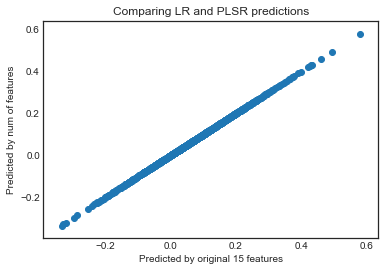

Number of dimensions:  2
R-squared regression: 0.00812072567146
R-squared PLSR: 0.00812018622203
Difference:  5.39449431014e-07


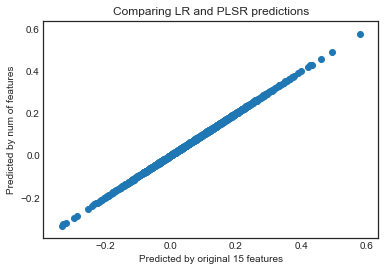

Number of dimensions:  1
R-squared regression: 0.00812072567146
R-squared PLSR: 0.00803151109048
Difference:  8.92145809797e-05


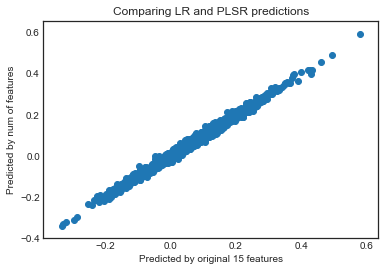

In [63]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)


# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to all dimensions.
for num in range(p, 0, -1):
    pls1 = PLSRegression(n_components=num)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    print('Number of dimensions: ',num)
    print('R-squared regression:', regr.score(X, y))
    print('R-squared PLSR:', pls1.score(X, y))
    print('Difference: ', regr.score(X, y)-pls1.score(X, y))

    # Compare the predictions of the two models
    plt.scatter(Y_pred,Y_PLS_pred) 
    plt.xlabel('Predicted by original 15 features')
    plt.ylabel('Predicted by num of features')
    plt.title('Comparing LR and PLSR predictions')
    plt.show()

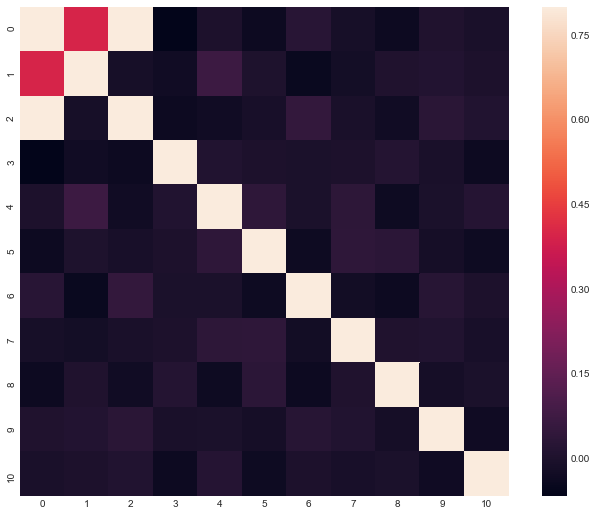

In [64]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0]+2 * X[:, 1] + np.random.normal(size=n * 1)+5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Number of dimensions:  10
R-squared regression: 0.815368020951
R-squared PLSR: 0.815368020951
Difference:  0.0


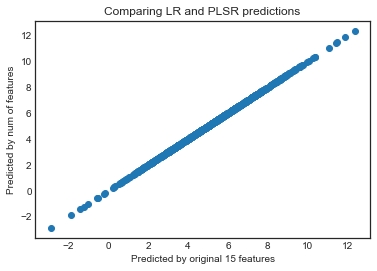

Number of dimensions:  9
R-squared regression: 0.815368020951
R-squared PLSR: 0.815368020951
Difference:  0.0


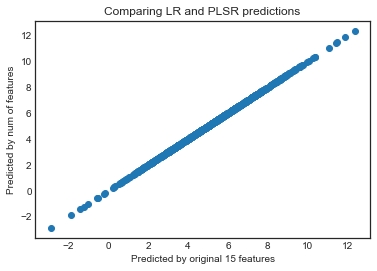

Number of dimensions:  8
R-squared regression: 0.815368020951
R-squared PLSR: 0.815368020951
Difference:  0.0


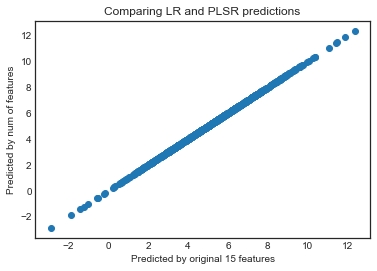

Number of dimensions:  7
R-squared regression: 0.815368020951
R-squared PLSR: 0.815368020951
Difference:  0.0


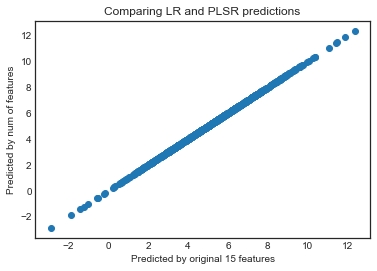

Number of dimensions:  6
R-squared regression: 0.815368020951
R-squared PLSR: 0.815368020951
Difference:  7.77156117238e-16


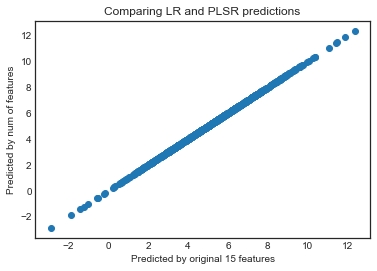

Number of dimensions:  5
R-squared regression: 0.815368020951
R-squared PLSR: 0.81536802095
Difference:  8.1334938784e-13


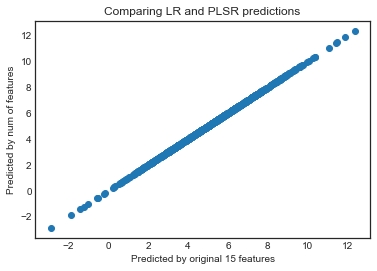

Number of dimensions:  4
R-squared regression: 0.815368020951
R-squared PLSR: 0.815368020501
Difference:  4.50382953154e-10


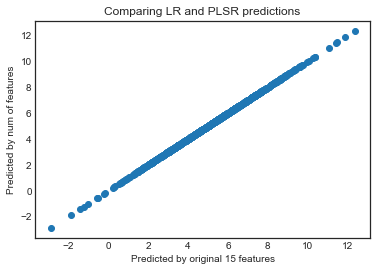

Number of dimensions:  3
R-squared regression: 0.815368020951
R-squared PLSR: 0.81536795645
Difference:  6.45008911837e-08


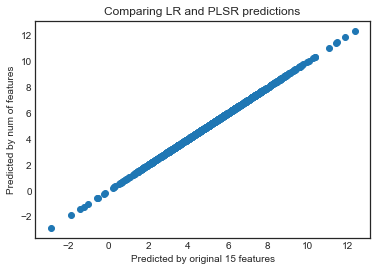

Number of dimensions:  2
R-squared regression: 0.815368020951
R-squared PLSR: 0.815352536228
Difference:  1.54847236998e-05


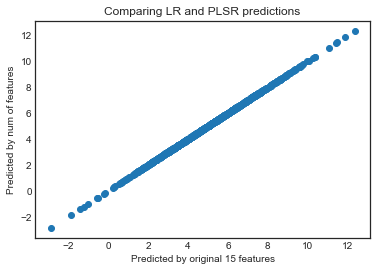

Number of dimensions:  1
R-squared regression: 0.815368020951
R-squared PLSR: 0.810709206493
Difference:  0.0046588144579


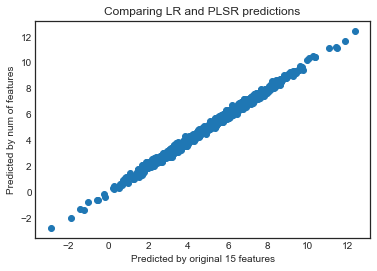

In [65]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)


# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to all dimensions.
for num in range(p, 0, -1):
    pls1 = PLSRegression(n_components=num)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    print('Number of dimensions: ',num)
    print('R-squared regression:', regr.score(X, y))
    print('R-squared PLSR:', pls1.score(X, y))
    print('Difference: ', regr.score(X, y)-pls1.score(X, y))

    # Compare the predictions of the two models
    plt.scatter(Y_pred,Y_PLS_pred) 
    plt.xlabel('Predicted by original 15 features')
    plt.ylabel('Predicted by num of features')
    plt.title('Comparing LR and PLSR predictions')
    plt.show()

Taking out the noise in the data doesn't affect how many dimensions I can drop without affecting the expected values until I get down to 1 feature. 